In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Simulate academic performance dataset
data = {
    'student_id': range(1, 21),
    'name': ['Student_' + str(i) for i in range(1, 21)],
    'math_score': [88, 92, 85, np.nan, 78, 90, 67, 95, 81, 89, 102, 73, 76, 65, 84, 79, np.nan, 93, 88, 120],  # Has missing + outlier
    'science_score': [75, 85, 89, 80, 70, 95, 65, 88, 90, 85, 78, 72, 71, 60, 74, 77, 66, 91, 84, 82],
    'attendance_percent': [95, 92, 88, 91, 85, 90, 60, 96, 89, 87, 93, 59, 90, 92, 81, 78, 66, 98, 94, 75]
}

df = pd.DataFrame(data)


In [2]:
df

,student_id,name,math_score,science_score,attendance_percent
0,1,Student_1,88.0,75,95
1,2,Student_2,92.0,85,92
2,3,Student_3,85.0,89,88
3,4,Student_4,NaN,80,91
4,5,Student_5,78.0,70,85
5,6,Student_6,90.0,95,90
6,7,Student_7,67.0,65,60
7,8,Student_8,95.0,88,96
8,9,Student_9,81.0,90,89
9,10,Student_10,89.0,85,87


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          20 non-null     int64  
 1   name                20 non-null     object 
 2   math_score          18 non-null     float64
 3   science_score       20 non-null     int64  
 4   attendance_percent  20 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 928.0+ bytes


In [5]:
df.describe()

,student_id,math_score,science_score,attendance_percent
count,20.00000,18.000000,20.000000,20.000000
mean,10.50000,85.833333,78.850000,84.950000
std,5.91608,12.889804,9.664231,11.641464
min,1.00000,65.000000,60.000000,59.000000
25%,5.75000,78.250000,71.750000,80.250000
50%,10.50000,86.500000,79.000000,89.500000
75%,15.25000,91.500000,85.750000,92.250000
max,20.00000,120.000000,95.000000,98.000000


In [6]:
df.isnull()

,student_id,name,math_score,science_score,attendance_percent
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,True,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [8]:
df.isnull().sum()

student_id            0
name                  0
math_score            2
science_score         0
attendance_percent    0
dtype: int64

In [18]:
df['math_score'].fillna(df['math_score'].mean(),inplace = True)

In [19]:
df

,student_id,name,math_score,science_score,attendance_percent
0,1,Student_1,88.000000,75,95
1,2,Student_2,92.000000,85,92
2,3,Student_3,85.000000,89,88
3,4,Student_4,85.833333,80,91
4,5,Student_5,78.000000,70,85
5,6,Student_6,90.000000,95,90
6,7,Student_7,67.000000,65,60
7,8,Student_8,95.000000,88,96
8,9,Student_9,81.000000,90,89
9,10,Student_10,89.000000,85,87


In [37]:
Q1 = df['math_score'].quantile(0.25)
Q3 = df['math_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_math = detect_outliers_iqr('math_score')
print(outliers_math)


    student_id        name  math_score  science_score  attendance_percent
19          20  Student_20       120.0             82                  75


<Axes: ylabel='math_score'>

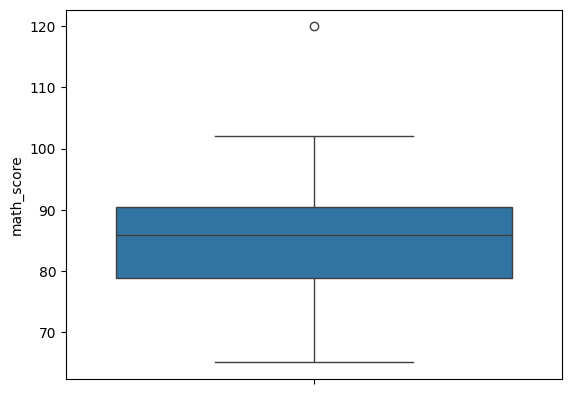

In [38]:
sns.boxplot(df['math_score'])

In [39]:
df_cleaned = df[(df['math_score'] >= lower_bound) & (df['math_score'] <= upper_bound)]


In [40]:
df_cleaned

,student_id,name,math_score,science_score,attendance_percent
0,1,Student_1,88.000000,75,95
1,2,Student_2,92.000000,85,92
2,3,Student_3,85.000000,89,88
3,4,Student_4,85.833333,80,91
4,5,Student_5,78.000000,70,85
5,6,Student_6,90.000000,95,90
6,7,Student_7,67.000000,65,60
7,8,Student_8,95.000000,88,96
8,9,Student_9,81.000000,90,89
9,10,Student_10,89.000000,85,87


<Axes: ylabel='math_score'>

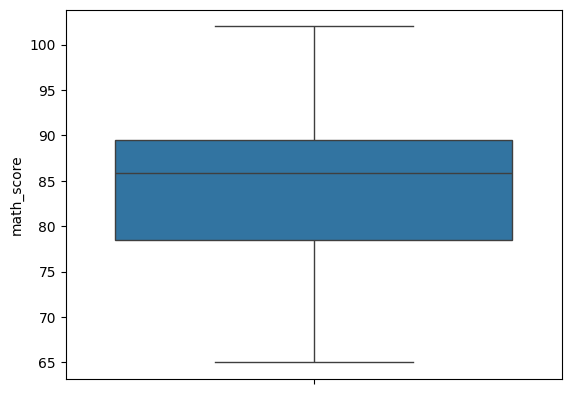

In [41]:
sns.boxplot(df_cleaned['math_score'])